## Cassandra

#### Iniciar cliente de cassandra e importar librerías

In [1]:
import folium
import pandas as pd
import matplotlib.pyplot as plt
from cassandra.cluster import Cluster

cluster = Cluster()
session = cluster.connect()
session.set_keyspace('twitter')
print(session.execute('SELECT COUNT(*) FROM tweets').one()[0], 'documents')

966 documents


#### Los 10 tweets más recientes

In [2]:
tweets = session.execute('SELECT id, username, text, created_at FROM tweets')
data = pd.DataFrame(list(tweets))
data.sort_values('created_at', ascending=False).head(10)

,id,username,text,created_at
459,594789566252453889,ameanmbot,RT @rvanhoepen: My @Quora answer to Is Angular...,2015-05-03 09:04:17
914,594789484916514816,ameanmbot,RT @kazuyadesse: 2件のコメント http://t.co/w6K1Dw6IJ...,2015-05-03 09:03:58
507,594789034016268288,ameanmbot,RT @haduart: Interesting #couchdb weekly http:...,2015-05-03 09:02:11
682,594788972854902784,mashable,"An affordable, real gold Apple Watch can be yo...",2015-05-03 09:01:56
566,594788791329632256,ameanmbot,RT @findmjob: Backend Devloper http://t.co/7dk...,2015-05-03 09:01:13
671,594788703018573824,ameanmbot,RT @webinara: RT: http://t.co/38hiPyvCAL #webi...,2015-05-03 09:00:52
331,594788642431852544,javacodegeeks,Testing with #Mockito - Kick-ass #Java Code Ge...,2015-05-03 09:00:37
353,594788595652829184,ameanmbot,RT @webcodegeeks: A canonical web test in Node...,2015-05-03 09:00:26
375,594788594570686464,Inc,9 Interview Questions Ideo Asks @IlanMochari h...,2015-05-03 09:00:26
555,594788522315292673,ChelseaFC,Keep up with the Blues today... http://t.co/Em...,2015-05-03 09:00:09


#### Los 10 tweets con más retweets

In [3]:
max_retweets = session.execute('SELECT id, username, text, retweet_count, created_at FROM tweets')
data = pd.DataFrame(list(max_retweets))
data.sort_values('retweet_count', ascending=False).head(10)

,id,username,text,retweet_count,created_at
495,594163852109094912,zeldman,RT @alex_macdonald: I will fight to support th...,9132,2015-05-01 15:37:56
858,594153080976998400,zeldman,RT @EliLanger: There are 2 kinds of people in ...,4061,2015-05-01 14:55:07
517,592371151445307392,ChelseaFC,FULL-TIME: Arsenal 0-0 @ChelseaFC. #CFCLive #A...,3804,2015-04-26 16:54:22
187,594153610633699329,cnnbrk,"Meet Marilyn Mosby, the state's attorney who c...",3134,2015-05-01 14:57:14
840,592383051004542976,ChelseaFC,Mourinho on Arsenal fans' chants: 'Boring is 1...,2610,2015-04-26 17:41:39
777,592366832457220096,cnnbrk,The overall death toll in the #NepalQuake has ...,2146,2015-04-26 16:37:13
113,592371156625141760,premierleague,FULL-TIME Arsenal 0-0 Chelsea. The Blues need ...,2069,2015-04-26 16:54:24
954,591993187629211648,FCBarcelona,FULL TIME: There's the final whistle! #Messi &...,1810,2015-04-25 15:52:29
688,592030680009330689,FCBarcelona,"RT @JordiAlba: Hoy día especial,un año que se ...",1793,2015-04-25 18:21:28
16,592028831566921729,FCBarcelona,RT @3gerardpique: Gran victoria en Cornellà! S...,1661,2015-04-25 18:14:07


#### Los 10 tweets con más favoritos

In [4]:
max_favorites = session.execute('SELECT id, username, text, favorite_count, created_at FROM tweets')
data = pd.DataFrame(list(max_favorites))
data.sort_values('favorite_count', ascending=False).head(10)

,id,username,text,favorite_count,created_at
449,592025821428191232,ultrAslan,SEN ŞAMPİYON OLACAKSINNNNNNNN! \nSENİ SEVMEYEN...,1748,2015-04-25 18:02:09
187,594153610633699329,cnnbrk,"Meet Marilyn Mosby, the state's attorney who c...",1721,2015-05-01 14:57:14
587,592030833319501824,instagram,Following the journey of two creatives and the...,1494,2015-04-25 18:22:04
955,594162319355158528,RT_Erdogan,"Eskiler, önce yoldaş sonra yol derdi. Eğer iyi...",1311,2015-05-01 15:31:50
840,592383051004542976,ChelseaFC,Mourinho on Arsenal fans' chants: 'Boring is 1...,1105,2015-04-26 17:41:39
517,592371151445307392,ChelseaFC,FULL-TIME: Arsenal 0-0 @ChelseaFC. #CFCLive #A...,1099,2015-04-26 16:54:22
86,592025253620101120,SabriReyiziniz,4ncü hakem uzatmayı gösterdi :( http://t.co/OP...,1092,2015-04-25 17:59:54
954,591993187629211648,FCBarcelona,FULL TIME: There's the final whistle! #Messi &...,1011,2015-04-25 15:52:29
880,592022338566234112,SabriReyiziniz,Emre Güral Volkan'ı kötürüm bıraktı :(,854,2015-04-25 17:48:19
777,592366832457220096,cnnbrk,The overall death toll in the #NepalQuake has ...,840,2015-04-26 16:37:13


#### Los tweets del usuario @CsharpCorner

In [5]:
user_tweets = session.execute("SELECT id, text, retweet_count, favorite_count, created_at FROM tweets " +
                              "WHERE username = 'CsharpCorner' ALLOW FILTERING")
data = pd.DataFrame(list(user_tweets))
data.sort_values('created_at', ascending=False)

,id,text,retweet_count,favorite_count,created_at
2,594787680254238720,MVC For Beginners: How to Save Record Using MV...,0,1,2015-05-03 08:56:48
3,594762014037180416,Learn Series of How to Crack Coding Interview ...,3,3,2015-05-03 07:14:48
6,594754412456775681,RT @dbeniwal21: Free Ebook by @ksr007 Basic SQ...,5,0,2015-05-03 06:44:36
7,594165671182802945,Are you ready &amp; #Excited for #Day3 #Build2...,20,4,2015-05-01 15:45:09
5,594165361857069056,#MicrosoftBand SDK Available Now by @mcbeniwal...,19,4,2015-05-01 15:43:55
0,594165244273922048,#Build2015 Day3: About to start @CsharpCorner ...,18,5,2015-05-01 15:43:27
1,592383013217939457,RT @mcbeniwal: Good #advice by @AnilAwadh on c...,1,0,2015-04-26 17:41:30
8,592025506049961985,#Xamarin Guide 8: Change the App.cs to App.xam...,0,0,2015-04-25 18:00:54
4,591995296189534208,ServiceController Class in Windows Service by ...,2,0,2015-04-25 16:00:52


#### Los 10 usuarios con más seguidores

In [6]:
users = session.execute('SELECT id, username, name, description, statuses_count, followers_count FROM users')
data = pd.DataFrame(list(users))
data.sort_values('followers_count', ascending=False).head(10)

,id,username,name,description,statuses_count,followers_count
94,813286,BarackObama,Barack Obama,This account is run by Organizing for Action s...,13440,58672161
41,180505807,instagram,Instagram,Capturing and sharing the world's moments. Nee...,6152,38541311
25,44409004,shakira,Shakira,We invite you to join our #WorldBabyShower for...,3479,30724211
6,428333,cnnbrk,CNN Breaking News,Breaking news from reporters and editors on th...,39782,26405869
114,50393960,BillGates,Bill Gates,Sharing things I'm learning through my foundat...,1649,21651557
91,96951800,FCBarcelona,FC Barcelona,Official account. Also follow us at @fcbarcelo...,61492,14858037
66,742143,BBCWorld,BBC News (World),"World News, features and analysis (http://t.co...",200319,9804962
22,11348282,NASA,NASA,Explore the universe and discover our home pla...,36545,9756827
39,343627165,premierleague,Premier League,Official Twitter account of the Premier League...,50270,8318044
53,17093617,hootsuite,Hootsuite,Social media news and tips from the world’s mo...,20790,6738983


#### Tweets agrupados por idioma

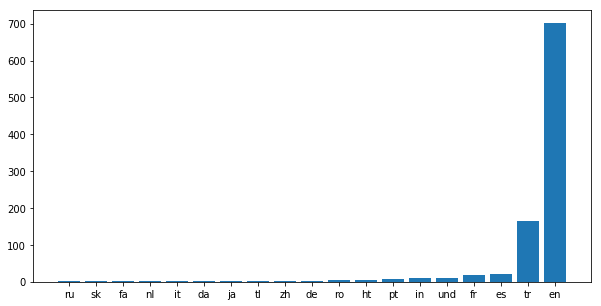

In [7]:
tweets_by_lang = session.execute('SELECT * FROM tweets_by_lang')
data = pd.DataFrame(list(tweets_by_lang))
data = data.sort_values('count', ascending=True)

plt.figure(figsize=(10, 5))
plt.bar(data['lang'], data['count'])
plt.show()

#### Tweets agrupados por hora

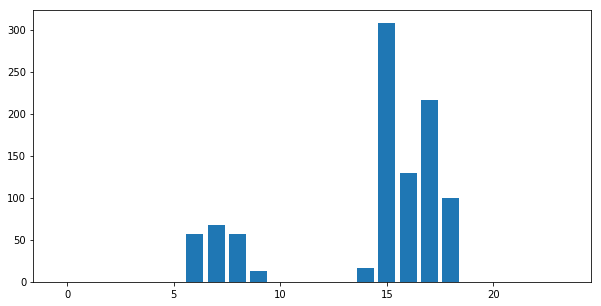

In [8]:
tweets_by_hour = session.execute('SELECT * FROM tweets_by_hour')
data = pd.DataFrame(list(tweets_by_hour))

plt.figure(figsize=(10, 5))
plt.bar(data['hour'], data['count'])
plt.show()

#### Tweets agrupados por fuente

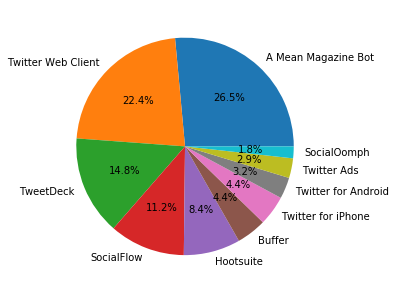

In [9]:
tweets_by_source = session.execute('SELECT * FROM tweets_by_source')
data = pd.DataFrame(list(tweets_by_source))
data = data.sort_values('count', ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.pie(data['count'], labels=data['source'], autopct='%1.1f%%')
plt.show()

#### Usuarios agrupados por ubicación

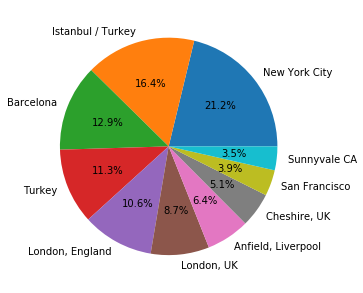

In [10]:
users_by_location = session.execute('SELECT * FROM users_by_location')
data = pd.DataFrame(list(users_by_location))
data = data.sort_values('count', ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.pie(data['count'], labels=data['location'], autopct='%1.1f%%')
plt.show()

####  Trending Topics mundiales

In [11]:
trending_topics = session.execute('SELECT * FROM trending_topics')
data = pd.DataFrame(list(trending_topics))
data.sort_values('count', ascending=False).head(10)

,hashtag,count
205,#FCBLive,27
335,#AngularJS,21
359,#nodejs,20
332,#LFC,19
148,#EspanyolFCB,18
329,#IWCI,16
267,#webinar,16
233,#GlobalMoms,14
340,#javascript,14
238,#RedBizUK,12


#### Coordenadas de todos los tweets

In [12]:
m = folium.Map(location=[30, 0], zoom_start=2, tiles='OpenStreetMap')
trending_topics = session.execute('SELECT * FROM tweets_coordinates')
for tweet in list(trending_topics):
    x = tweet[1]
    y = tweet[2]
    place = tweet[3]
    folium.Marker([x,y], popup=place).add_to(m)
m